# Integral for the Growth Factor

Here we just test the integration method for the growth factor, to check speed and accuracy.

In [15]:
import numpy as np
from astropy.cosmology import Planck15
from scipy import integrate as intg
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
amin = 1e-8
dlna = 0.01

cosmo = Planck15

In [34]:
def dplus(z, getvec=False):
    """
    Finds the factor :math:`D^+(a)`, from Lukic et. al. 2007, eq. 8.

    Parameters
    ----------
    z : float
        The redshift

    getvec : bool, optional
        Whether to treat `z` as a maximum redshift and return a whole vector
        of values up to `z`. In this case, the minimum scale factor and the
        step size are defined in :attr:`_defaults` and can be over-ridden
        at instantiation.

    Returns
    -------
    dplus : float
        The un-normalised growth factor.
    """

    a_upper = 1.0 / (1.0 + z)
    nlna = 1 + int((np.log(a_upper) - np.log(amin))/dlna)

    lna = np.linspace(np.log(amin), np.log(a_upper), nlna)
    _zvec = 1.0 / np.exp(lna) - 1.0

    integrand = 1.0 / (np.exp(lna) * cosmo.efunc(_zvec)) ** 3

    if not getvec:
        integral = intg.simps(np.exp(lna) * integrand, lna,even="avg")
        dplus = 5.0 * cosmo.Om0 * cosmo.efunc(z) * integral / 2.0
    else:
        integral = intg.cumtrapz(np.exp(lna) * integrand, dx=dlna, initial=0.0)
        dplus = 5.0 * cosmo.Om0 * cosmo.efunc(_zvec) * integral / 2.0

    return dplus

In [47]:
%%timeit
Z = np.linspace(0,1,5000)
g = np.zeros(5000)

for i,z in enumerate(Z):
    g[i] = dplus(z)

1 loop, best of 3: 2.57 s per loop


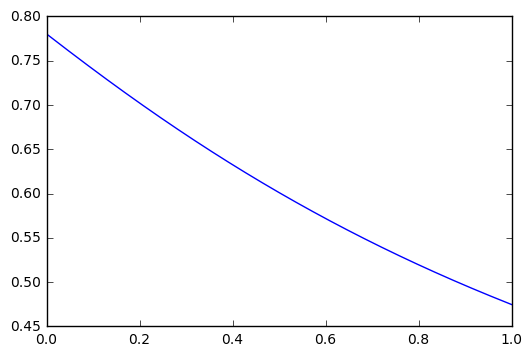

In [36]:
plt.plot(Z,g)

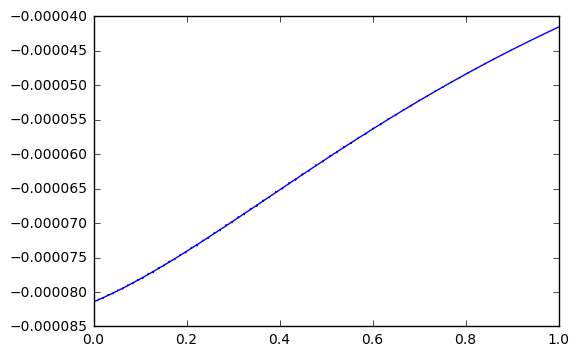

In [37]:
plt.plot(Z[:-1],np.diff(g))

In [42]:
def dplus_dlna(z, getvec=False):
    """
    Finds the factor :math:`D^+(a)`, from Lukic et. al. 2007, eq. 8.

    Parameters
    ----------
    z : float
        The redshift

    getvec : bool, optional
        Whether to treat `z` as a maximum redshift and return a whole vector
        of values up to `z`. In this case, the minimum scale factor and the
        step size are defined in :attr:`_defaults` and can be over-ridden
        at instantiation.

    Returns
    -------
    dplus : float
        The un-normalised growth factor.
    """

    a_upper = 1.0 / (1.0 + z)
    
    lna = np.arange(np.log(amin), np.log(a_upper), dlna)
    lna = np.hstack((lna,np.log(a_upper)))
    
    _zvec = 1.0 / np.exp(lna) - 1.0

    integrand = 1.0 / (np.exp(lna) * cosmo.efunc(_zvec)) ** 3

    if not getvec:
        integral = intg.simps(integrand, np.exp(lna),even="avg")
        dplus = 5.0 * cosmo.Om0 * cosmo.efunc(z) * integral / 2.0
    else:
        integral = intg.cumtrapz(np.exp(lna) * integrand, dx=dlna, initial=0.0)
        dplus = 5.0 * cosmo.Om0 * cosmo.efunc(_zvec) * integral / 2.0

    return dplus

In [46]:
%%timeit
Z = np.linspace(0,1,5000)
g_dlna = np.zeros(5000)

for i,z in enumerate(Z):
    g_dlna[i] = dplus_dlna(z)

1 loop, best of 3: 2.55 s per loop


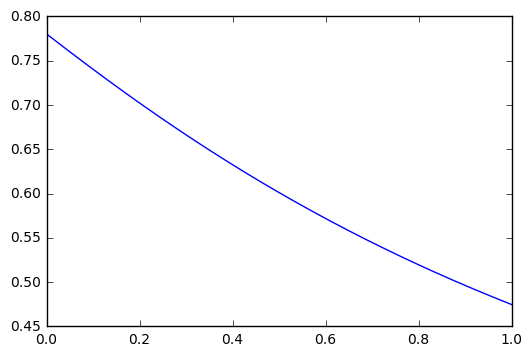

In [44]:
plt.plot(Z,g_dlna)

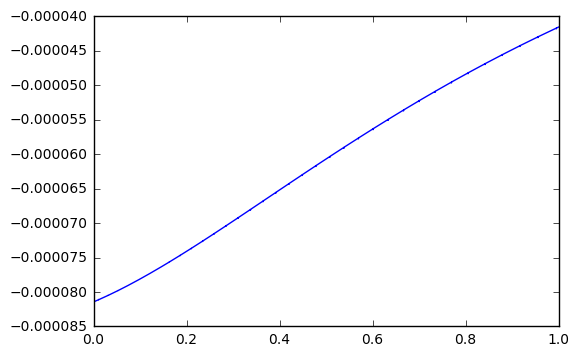

In [45]:
plt.plot(Z[:-1],np.diff(g_dlna))